In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_val = pd.read_csv('data/validation.csv')

## Feature engineering

In [3]:
def encode_days(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.weekday,prefix='day')],axis=1)
    dataframe = dataframe.drop('weekday',axis=1)
    return dataframe

In [4]:
def encode_hours(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.hour,prefix='hour')],axis=1)
    dataframe = dataframe.drop('hour',axis=1)
    return dataframe

In [5]:
def encode_region(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.region,prefix='region')],axis=1)
    dataframe = dataframe.drop('region',axis=1)
    return dataframe

In [6]:
def encode_adexchange(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.adexchange,prefix='adexchange')],axis=1)
    dataframe = dataframe.drop('adexchange',axis=1)
    return dataframe

In [7]:
def encode_slotwidth(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotwidth,prefix='slotwidth')],axis=1)
    dataframe = dataframe.drop('slotwidth',axis=1)
    return dataframe

In [8]:
def encode_slotheight(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotheight,prefix='slotheight')],axis=1)
    dataframe = dataframe.drop('slotheight',axis=1)
    return dataframe

In [9]:
def encode_advertiser(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.advertiser,prefix='advertiser')],axis=1)
    dataframe = dataframe.drop('advertiser',axis=1)
    return dataframe

In [10]:
def encode_slotvisibility(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotvisibility,prefix='slotvisibility')],axis=1)
    dataframe = dataframe.drop('slotvisibility',axis=1)
    return dataframe

In [11]:
def encode_slotformat(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotformat,prefix='slotformat')],axis=1)
    dataframe = dataframe.drop('slotformat',axis=1)
    return dataframe

In [12]:
def encode_os_browser(dataframe):
    df_temp = pd.DataFrame(dataframe.useragent.str.split('_',1).tolist(), columns = ['OS','browser'])
    dataframe = pd.concat([dataframe,df_temp],axis=1)
    dataframe = dataframe.drop('useragent',axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.OS,prefix='OS')],axis=1)
    dataframe = dataframe.drop('OS',axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.browser,prefix='browser')],axis=1)
    dataframe = dataframe.drop('browser',axis=1)
    return dataframe

In [13]:
# 12. Encode slotprice into 5 ranges
def encode_slotprice(dataframe):
    slotprice_range = pd.DataFrame()
    slotprice_range['slotprices'] = pd.cut(dataframe.slotprice.values,5, labels=[1,2,3,4,5])
    dataframe = pd.concat([dataframe,slotprice_range],axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotprices,prefix='slotprice')],axis=1)
    dataframe = dataframe.drop('slotprice',axis=1)
    dataframe = dataframe.drop('slotprices',axis=1)
    return dataframe

In [14]:
def encode_usertags(dataframe):
    usertags = list(dataframe.usertag)
    unique_users = set()
    list_users = []
    for user in usertags:
        u = user.split(',')
        list_users.append(u)
        for us in u:
            unique_users.add(us)
    users = pd.DataFrame()
    for user in unique_users:
        users["user_"+user] = 0
    dataframe = pd.concat([dataframe,users],axis=1)
    for user in unique_users:
        datas = []
        for users in list_users:
            if user in users:
                datas.append(1)
            else:
                datas.append(0)
        dataframe["user_"+user] = datas
    dataframe = dataframe.drop('usertag',axis=1)
    return dataframe

In [15]:
xtrain = df_train.drop(['click','bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
ytrain = df_train.click

xval = df_val.drop(['click','bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
yval = df_val.click

xtest = df_test.drop(['bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','keypage'], axis=1)

In [16]:
xtrain = encode_adexchange(xtrain)
xtrain = encode_advertiser(xtrain)
xtrain = encode_days(xtrain)
xtrain = encode_hours(xtrain)
xtrain = encode_os_browser(xtrain)
xtrain = encode_region(xtrain)
xtrain = encode_slotformat(xtrain)
xtrain = encode_slotheight(xtrain)
xtrain = encode_slotprice(xtrain)
xtrain = encode_slotvisibility(xtrain)
xtrain = encode_slotwidth(xtrain)
xtrain = encode_usertags(xtrain)
xtrain.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10006,user_10110,user_10059,user_10684,user_11632,user_10115,user_15398,user_11576,user_13496,user_10074
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,0


In [17]:
xval = encode_adexchange(xval)
xval = encode_advertiser(xval)
xval = encode_days(xval)
xval = encode_hours(xval)
xval = encode_os_browser(xval)
xval = encode_region(xval)
xval = encode_slotformat(xval)
xval = encode_slotheight(xval)
xval = encode_slotprice(xval)
xval = encode_slotvisibility(xval)
xval = encode_slotwidth(xval)
xval = encode_usertags(xval)
xval.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10006,user_10110,user_10059,user_10684,user_11632,user_10115,user_15398,user_16706,user_13496,user_10074
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
xtest = encode_adexchange(xtest)
xtest = encode_advertiser(xtest)
xtest = encode_days(xtest)
xtest = encode_hours(xtest)
xtest = encode_os_browser(xtest)
xtest = encode_region(xtest)
xtest = encode_slotformat(xtest)
xtest = encode_slotheight(xtest)
xtest = encode_slotprice(xtest)
xtest = encode_slotvisibility(xtest)
xtest = encode_slotwidth(xtest)
xtest = encode_usertags(xtest)
xtest.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10006,user_10110,user_10684,user_10059,user_11632,user_10115,user_15398,user_16706,user_13496,user_10074
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,0


## PCTR prediction using SGDClassifier 

In [19]:
#run on validation set
from sklearn.linear_model import SGDClassifier

In [20]:
model = SGDClassifier(loss='log', penalty='l2', alpha=0.00001, l1_ratio=0.15, n_iter=10, class_weight='balanced')

In [21]:
resultval = model.fit(xtrain, ytrain).predict(xval)

In [22]:
#run on test set
resulttest = model.fit(xtrain, ytrain).predict(xtest)

In [23]:
predprob = model.predict_proba(xval)

pCTRval = pd.DataFrame(predprob)
pCTRval.head()

,0,1
0,1.000000,2.495370e-13
1,0.000299,9.997014e-01
2,0.999963,3.656979e-05
3,0.999025,9.751581e-04
4,1.000000,1.697964e-10


In [24]:
#print AUc score
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(df_val.click, pCTRval[1])
metrics.auc(fpr, tpr)

0.75829125832197097

In [25]:
predprob = model.predict_proba(xtest)

pCTRtest = pd.DataFrame(predprob)
pCTRtest.head()

,0,1
0,0.924437,7.556348e-02
1,1.000000,3.534094e-07
2,1.000000,3.731831e-14
3,0.999936,6.411574e-05
4,1.000000,2.313313e-11


In [26]:
#recalibrate the pctr
#newpctr = pctr / ( pctr + (1-pctr)/balance_ratio)

new_pctrval = []
new_pctrtest = []

ratio = len(df_train) / 2 * np.bincount(df_train.click)
balance_ratio = ratio[1] / ratio[0]

for pctr in pCTRval[1]:
    new_pctrval.append( pctr / (pctr + ((1-pctr) / balance_ratio)))

for pctr in pCTRtest[1]:
    new_pctrtest.append( pctr / (pctr + ((1-pctr) / balance_ratio)))

In [27]:
new_pctrval = pd.DataFrame(new_pctrval)
new_pctrval.to_csv('pCTRval.csv')
new_pctrval.head()

,0
0,1.882841e-16
1,7.163845e-01
2,2.759415e-08
3,7.365075e-07
4,1.281171e-13


In [28]:
new_pctrtest = pd.DataFrame(new_pctrtest)
new_pctrtest.to_csv('pCTRtest.csv')
new_pctrtest.head()

,0
0,6.167183e-05
1,2.666595e-10
2,2.815793e-17
3,4.838060e-08
4,1.745473e-14


In [29]:
fpr, tpr, thresholds = metrics.roc_curve(df_val.click, new_pctrval)
metrics.auc(fpr, tpr)

0.7174420233776424

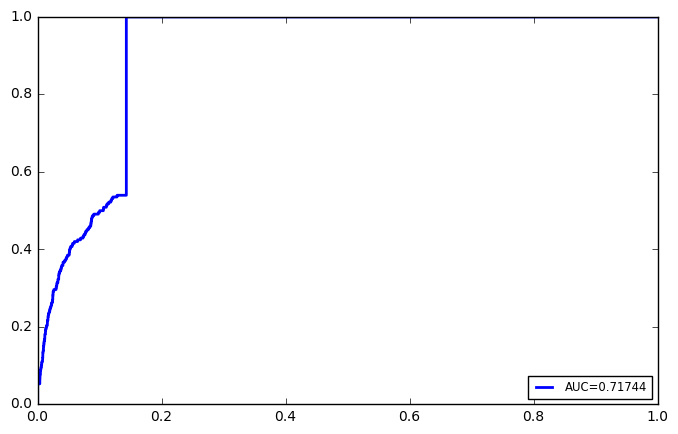

In [30]:
f, axes = plt.subplots(1, figsize=(8, 5))
lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
axes.step(fpr, tpr, lw=2,label=lab)
axes.legend(loc='lower right', fontsize='small')
plt.show()